#data used in this assignment: London Crimes Data
#https://www.kaggle.com/datasets/jboysen/london-crime



In [1]:
#Impport all the packages required
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#read data
df_london_crime = pd.read_csv("dataset/london_crime_by_lsoa.csv")

#check data info - this is to check any missing values or issues
df_london_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [2]:
#checking for missing values - no missing values
df_london_crime.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [4]:
#checking for the first 20 records - to get familiar with the contents and nuances
df_london_crime.head(20)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8


In [13]:
#aggregate the data by year
df_borough_crime_year = (
    df_london_crime
    .groupby('year')
    .agg({"value": "sum"})
    .rename(columns={"value": "total crimes"})
)
df_borough_crime_year

,total crimes
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


In [14]:

#aggregate crimes by major category and by year
df_borough_crime_cat_year = (
    df_london_crime
    .groupby(['major_category', 'year'])['value']
    .sum()
    .unstack()   # makes 'year' into columns
)

print(df_borough_crime_cat_year)

year                           2008    2009    2010    2011    2012    2013  \
major_category                                                                
Burglary                      88092   90619   86826   93315   93392   87222   
Criminal Damage               91872   85565   77897   70914   62158   56206   
Drugs                         68804   60549   58674   57550   51776   50278   
Fraud or Forgery               5325       0       0       0       0       0   
Other Notifiable Offences     10112   10644   10768   10264   10675   10811   
Robbery                       29627   29568   32341   36679   35260   29337   
Sexual Offences                1273       0       0       0       0       0   
Theft and Handling           283692  279492  290924  309292  334054  306372   
Violence Against the Person  159844  160777  157894  146901  150014  146181   

year                           2014    2015    2016  
major_category                                       
Burglary              

In [ ]:
#aggregate crimes by major category and by year (similar to above but year is the index and major category as columns)
df_borough_crime_cat_year = (
    df_london_crime
    .groupby(['year', 'major_category'])['value']
    .sum()
    .unstack()   # major_category → columns
)
df_borough_crime_cat_year

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


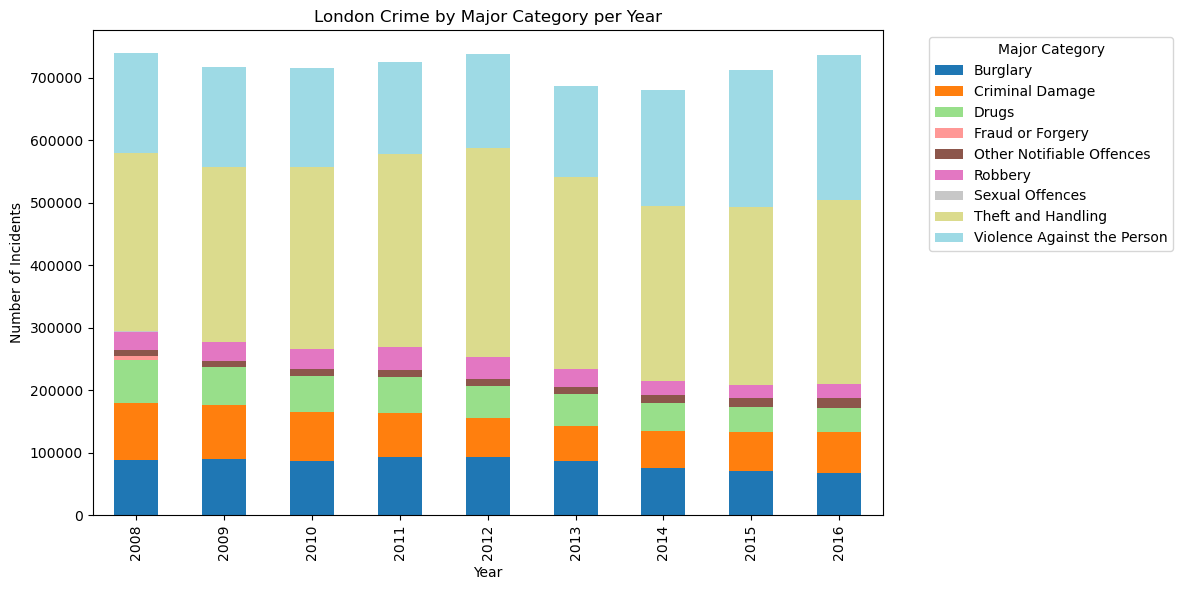

In [ ]:
# plot the above table to the chart
# plot stacked bar
df_borough_crime_cat_year.plot(kind='bar',
    stacked=True,
    figsize=(12,6),
    colormap='tab20'  # nice categorical colour set
    )

plt.title("London Crime by Major Category per Year")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.legend(title="Major Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# aggregated borough totals
df_borough = df_london_crime.groupby('borough').agg({"value": "sum"})

# adding dictionary of London boroughs with approximate geocodes
borough_coords = {
    "Barking and Dagenham": (51.5363, 0.0795),
    "Barnet": (51.6250, -0.1947),
    "Bexley": (51.4519, 0.1171),
    "Brent": (51.5588, -0.2817),
    "Bromley": (51.4085, 0.0188),
    "Camden": (51.5450, -0.1628),
    "Croydon": (51.3726, -0.1004),
    "Ealing": (51.5130, -0.3080),
    "Enfield": (51.6538, -0.0790),
    "Greenwich": (51.4821, 0.0052),
    "Hackney": (51.5450, -0.0550),
    "Hammersmith and Fulham": (51.4927, -0.2339),
    "Haringey": (51.5908, -0.1097),
    "Harrow": (51.5806, -0.3417),
    "Havering": (51.5806, 0.1830),
    "Hillingdon": (51.5337, -0.4489),
    "Hounslow": (51.4667, -0.3617),
    "Islington": (51.5380, -0.1020),
    "Kensington and Chelsea": (51.4941, -0.1909),
    "Kingston upon Thames": (51.4098, -0.3060),
    "Lambeth": (51.4600, -0.1167),
    "Lewisham": (51.4452, -0.0209),
    "Merton": (51.4098, -0.2106),
    "Newham": (51.5255, 0.0352),
    "Redbridge": (51.5886, 0.0824),
    "Richmond upon Thames": (51.4479, -0.3260),
    "Southwark": (51.5035, -0.0804),
    "Sutton": (51.3618, -0.1945),
    "Tower Hamlets": (51.5156, -0.0417),
    "Waltham Forest": (51.5908, -0.0180),
    "Wandsworth": (51.4570, -0.1910),
    "Westminster": (51.4975, -0.1370),
    "City of London": (51.5155, -0.0922),
}

# convert to DataFrame
df_coords = pd.DataFrame.from_dict(borough_coords, orient="index", columns=["lat", "lon"])

# join with crime totals
df_borough = df_borough.join(df_coords).rename(columns={"value": "total crimes"})

print(df_borough)

                        total crimes      lat     lon
borough                                              
Barking and Dagenham          149447  51.5363  0.0795
Barnet                        212191  51.6250 -0.1947
Bexley                        114136  51.4519  0.1171
Brent                         227551  51.5588 -0.2817
Bromley                       184349  51.4085  0.0188
Camden                        275147  51.5450 -0.1628
City of London                   780  51.5155 -0.0922
Croydon                       260294  51.3726 -0.1004
Ealing                        251562  51.5130 -0.3080
Enfield                       193880  51.6538 -0.0790
Greenwich                     181568  51.4821  0.0052
Hackney                       217119  51.5450 -0.0550
Hammersmith and Fulham        185259  51.4927 -0.2339
Haringey                      213272  51.5908 -0.1097
Harrow                        116848  51.5806 -0.3417
Havering                      138947  51.5806  0.1830
Hillingdon                  

In [34]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [28]:
import folium

# Create a base map centered roughly on London
m = folium.Map(location=[51.509865, -0.118092], zoom_start=10, tiles="cartodbpositron")

# Add borough circles
for borough, row in df_borough.iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lon"]],
        radius=5 + (row["value"] / df_borough["value"].max()) * 20,  # scale circle size
        color="red" if row["value"] == df_borough["value"].max() else
               "green" if row["value"] == df_borough["value"].min() else "blue",
        fill=True,
        fill_opacity=0.6,
        popup=f"{borough}: {row['value']:,} incidents"
    ).add_to(m)

# Save or display
m.save("london_crime_map.html")
m

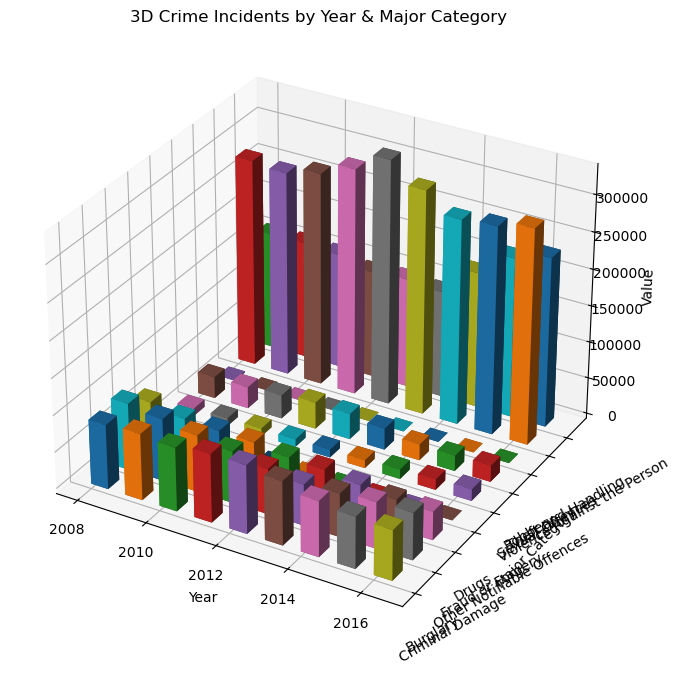

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Prepare data
df_borough_crime_cat_year = (
    df_london_crime
    .groupby(['major_category', 'year'])['value']
    .sum()
    .reset_index()
)

categories = df_borough_crime_cat_year['major_category'].unique()
years = df_borough_crime_cat_year['year'].unique()

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection="3d")

# Encode categories as numbers
cat_to_num = {cat: i for i, cat in enumerate(categories)}

# Loop and plot bars
for _, row in df_borough_crime_cat_year.iterrows():
    x = row['year']
    y = cat_to_num[row['major_category']]
    z = 0
    dx = 0.5
    dy = 0.5
    dz = row['value']
    ax.bar3d(x, y, z, dx, dy, dz)

# Format axes
ax.set_xlabel("Year")
ax.set_ylabel("Major Category")
ax.set_zlabel("Value")
ax.set_yticks(range(len(categories)))
ax.set_yticklabels(categories, rotation=30)

plt.title("3D Crime Incidents by Year & Major Category")
plt.show()

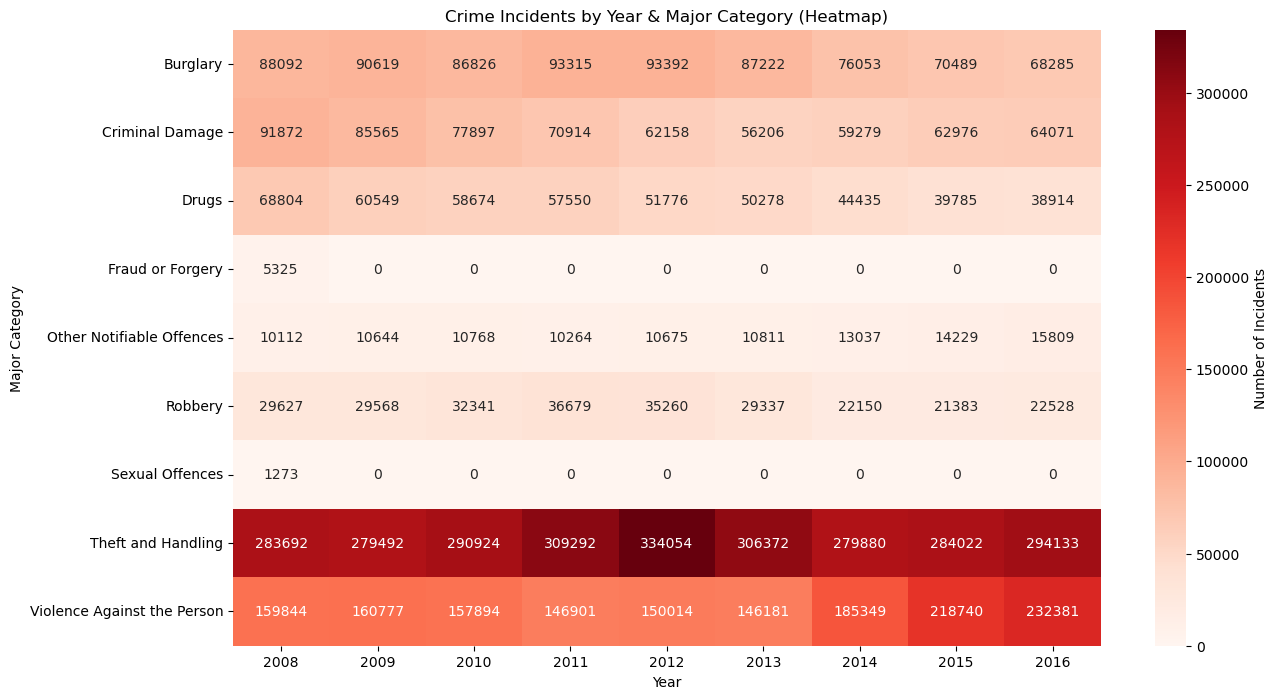

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data
df_borough_crime_cat_year = (
    df_london_crime
    .groupby(['major_category', 'year'])['value']
    .sum()
    .reset_index()
)

# Pivot for heatmap
pivot_df = df_borough_crime_cat_year.pivot(index="major_category", columns="year", values="value")

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_df, cmap="Reds", annot=True, fmt=".0f", cbar_kws={'label': 'Number of Incidents'})
plt.title("Crime Incidents by Year & Major Category (Heatmap)")
plt.xlabel("Year")
plt.ylabel("Major Category")
plt.show()

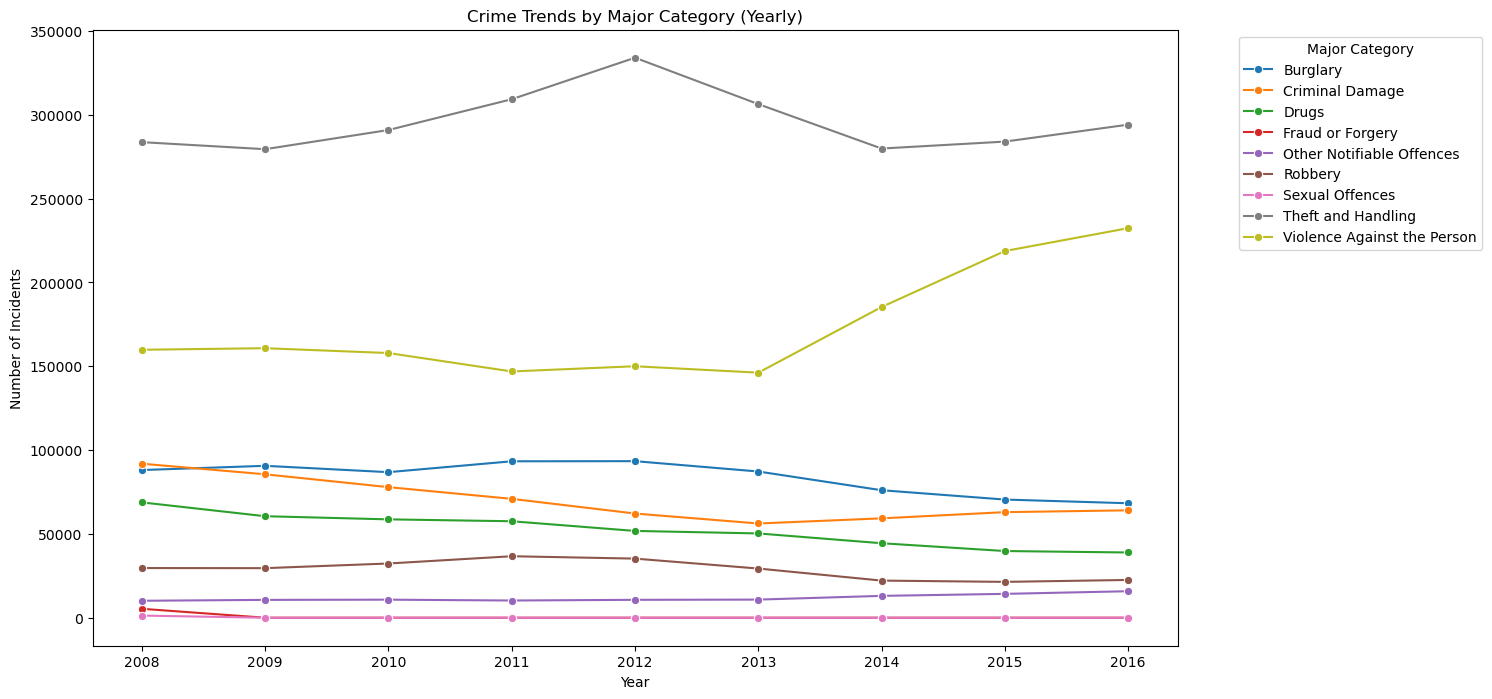

In [39]:
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=df_borough_crime_cat_year,
    x="year", y="value", hue="major_category", marker="o"
)
plt.title("Crime Trends by Major Category (Yearly)")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.legend(title="Major Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [38]:
import plotly.express as px

# Aggregate by year and major category
df_crime_cat_year = (
    df_london_crime
    .groupby(['year','major_category'])['value']
    .sum()
    .reset_index()
)

# Sort categories by total crime for cleaner Y-axis order
category_order = (
    df_crime_cat_year.groupby("major_category")["value"]
    .sum()
    .sort_values(ascending=False)
    .index
    .tolist()
)

# Bubble chart (better sizing + wider layout)
fig = px.scatter(
    df_crime_cat_year,
    x="year",
    y="major_category",
    size="value",
    color="major_category",
    hover_name="major_category",
    category_orders={"major_category": category_order},
    title="London Crime by Year and Major Category (Bubble Chart)",
    size_max=35,  # smaller bubbles
    height=700,
    width=1200
)

fig.update_layout(
    yaxis=dict(title="Major Category"),
    xaxis=dict(title="Year"),
    legend_title="Crime Category"
)

fig.show()

In [37]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [40]:
df_borough_crime_cat = (
    df_london_crime
    .groupby(['major_category'])['value']
    .sum()
)

print(df_borough_crime_cat)

major_category
Burglary                        754293
Criminal Damage                 630938
Drugs                           470765
Fraud or Forgery                  5325
Other Notifiable Offences       106349
Robbery                         258873
Sexual Offences                   1273
Theft and Handling             2661861
Violence Against the Person    1558081
Name: value, dtype: int64


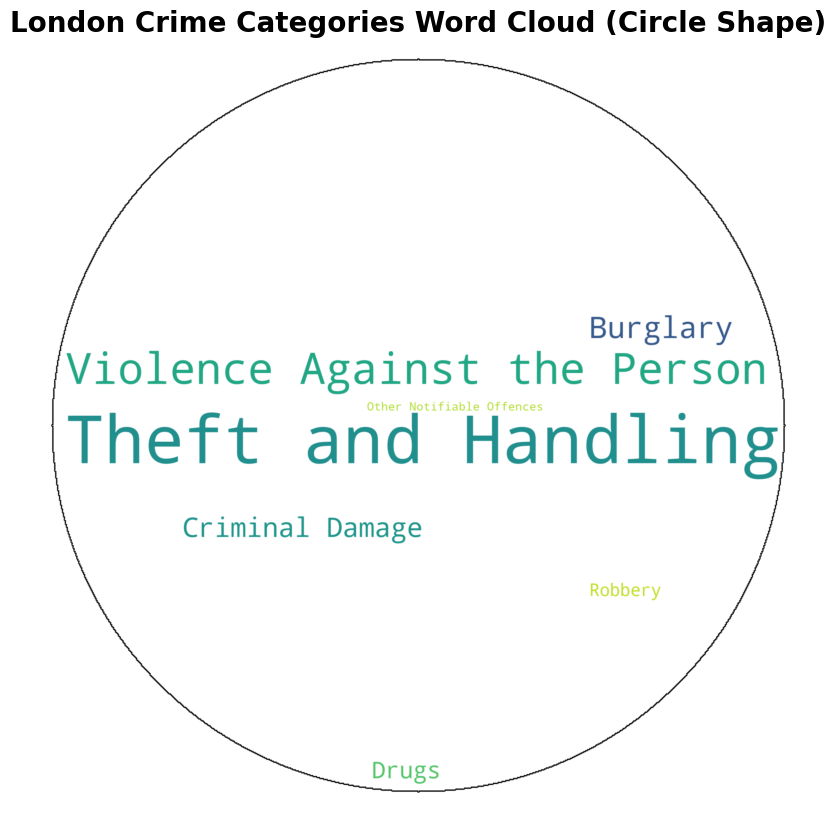

In [42]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

# aggregate crime counts by major category
df_borough_crime_cat = (
    df_london_crime
    .groupby(['major_category'])['value']
    .sum()
)

# create circular mask
x, y = np.ogrid[:800, :800]  
center = (400, 400)          
radius = 380                 
mask = (x - center[0])**2 + (y - center[1])**2 > radius**2
mask = 255 * mask.astype(int)  

# generate word cloud (tuned for bigger + denser words)
wc = WordCloud(
    width=800,
    height=800,
    background_color="white",
    colormap="viridis",
    mask=mask,
    contour_color="black",
    contour_width=2,
    max_font_size=250,      # make biggest word much larger
    prefer_horizontal=0.9,  # keep most words horizontal
    relative_scaling=0.6,   # balance word size better
    scale=3,                # higher resolution, sharper words
    min_font_size=10        # no tiny unreadable words
).generate_from_frequencies(df_borough_crime_cat.to_dict())

# plot
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("London Crime Categories Word Cloud (Circle Shape)", fontsize=20, weight="bold")
plt.show()

In [43]:
#aggregate crimes by LSOA_code (policing codes/ teritories)
df_borough_crime_lsoa = (
    df_london_crime
    .groupby(['lsoa_code'])['value']
    .sum()
)

print(df_borough_crime_lsoa)

lsoa_code
E01000001      35
E01000002      51
E01000003      31
E01000005     123
E01000006     835
             ... 
E01033742     277
E01033743    1444
E01033744     499
E01033745     541
E01033746     329
Name: value, Length: 4835, dtype: int64


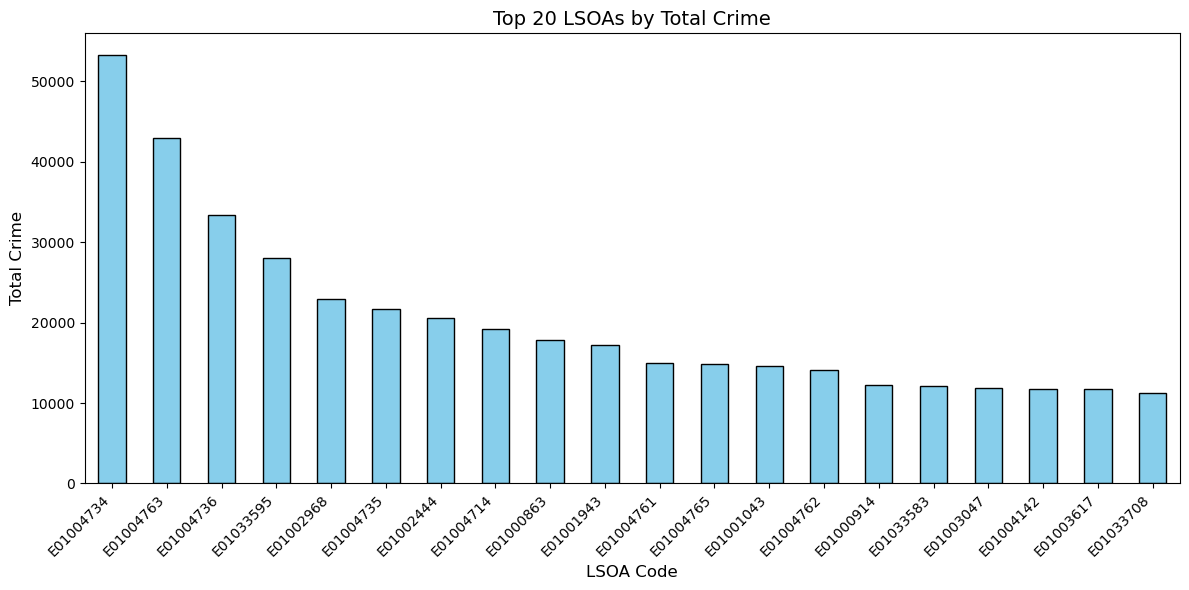

In [44]:
import matplotlib.pyplot as plt

# Sort values and take top 20 (you can change N)
top_lsoa = df_borough_crime_lsoa.sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(12, 6))
top_lsoa.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Top 20 LSOAs by Total Crime", fontsize=14)
plt.xlabel("LSOA Code", fontsize=12)
plt.ylabel("Total Crime", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

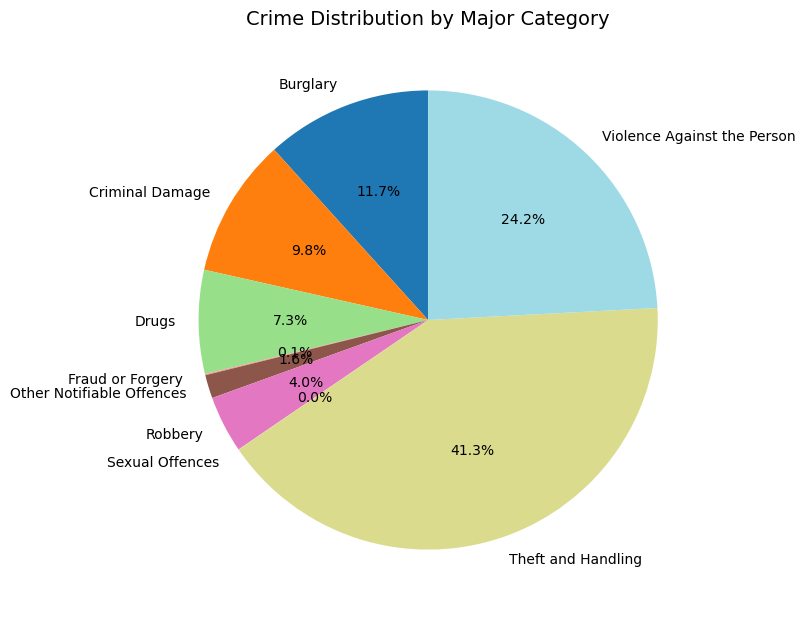

In [45]:
import matplotlib.pyplot as plt

# Plot pie chart
plt.figure(figsize=(8, 8))
df_borough_crime_cat.plot(
    kind='pie',
    autopct='%1.1f%%',  # show percentages
    startangle=90,      # rotate for better layout
    legend=False,
    colormap='tab20'    # colorful palette
)

plt.title("Crime Distribution by Major Category", fontsize=14)
plt.ylabel("")  # remove y-axis label
plt.tight_layout()
plt.show()

In [46]:
# Group by year and major category
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
df_london_crime = pd.read_csv("dataset/london_crime_by_lsoa.csv")
df_grouped = df_london_crime.groupby(['year', 'major_category'])['value'].sum().unstack()
df_grouped

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


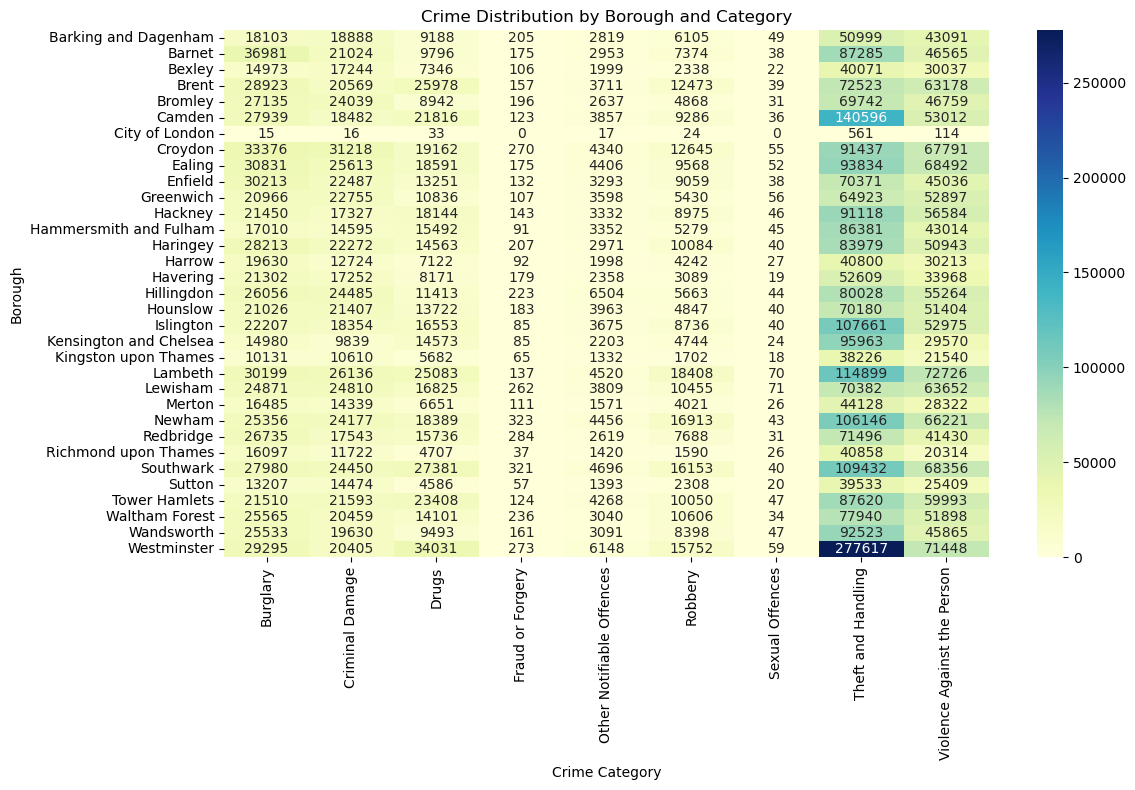

In [47]:
import seaborn as sns

# Group by borough and major category
df_borough = df_london_crime.groupby(['borough', 'major_category'])['value'].sum().unstack().fillna(0)

# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(df_borough, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Crime Distribution by Borough and Category')
plt.ylabel('Borough')
plt.xlabel('Crime Category')
plt.tight_layout()
plt.show()

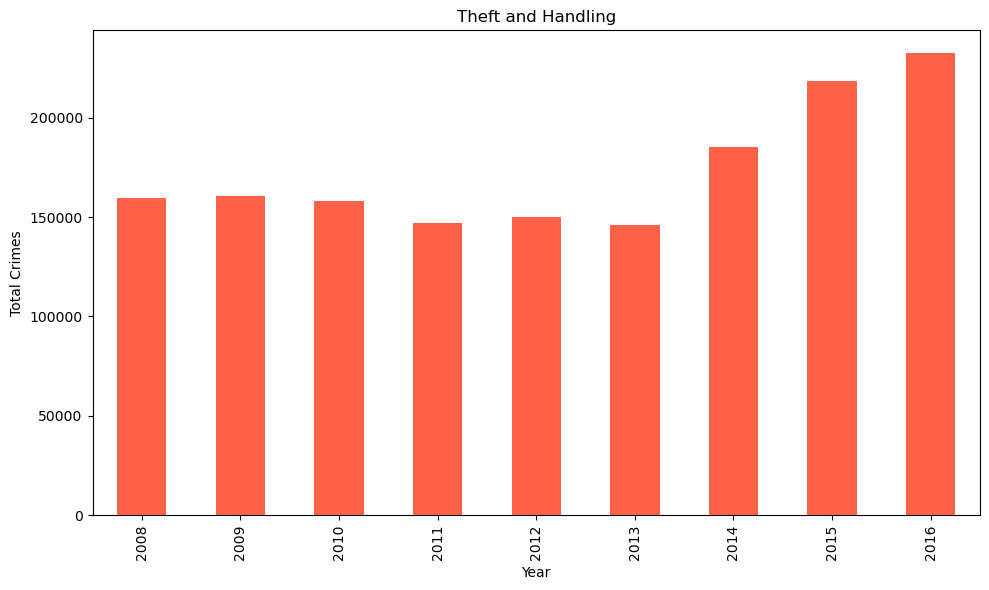

In [17]:
# Filter for a specific crime category, e.g., 'Violence Against the Person'
df_violence = df_london_crime[df_london_crime['major_category'] == 'Violence Against the Person']

# Group by year
df_violence_year = df_violence.groupby('year')['value'].sum()

# Plot
plt.figure(figsize=(10, 6))
df_violence_year.plot(kind='bar', color='tomato')
plt.title('Theft and Handling')
plt.ylabel('Total Crimes')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

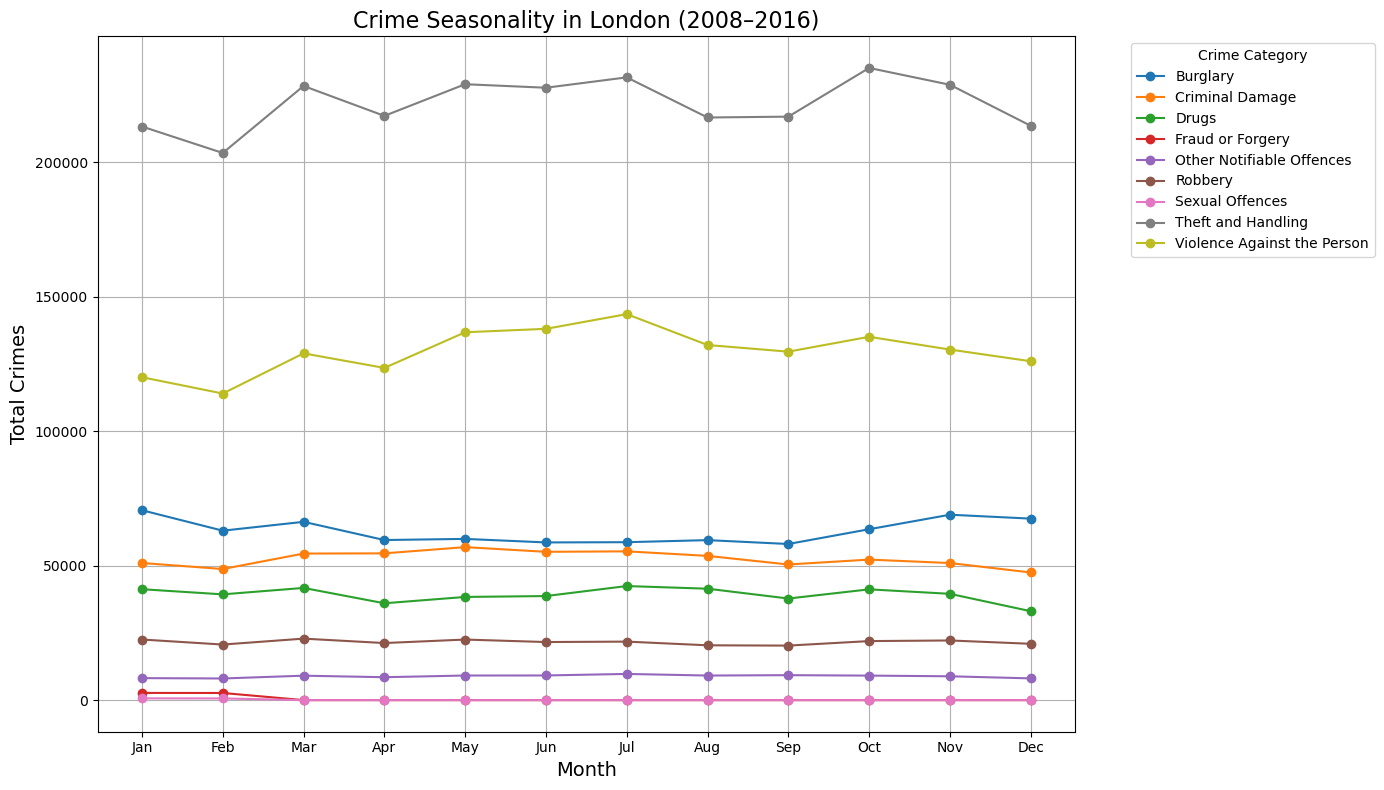

In [19]:
import matplotlib.pyplot as plt

# Group by month and major category
df_seasonality = df_london_crime.groupby(['month', 'major_category'])['value'].sum().unstack().fillna(0)

# Plot
plt.figure(figsize=(14, 8))
for category in df_seasonality.columns:
    plt.plot(df_seasonality.index, df_seasonality[category], marker='o', label=category)

# Customize axes
plt.title('Crime Seasonality in London (2008–2016)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Crimes', fontsize=14)
plt.xticks(ticks=range(1,13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.legend(title='Crime Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Analysis of London Crime Data (2008–2016)

1. Data Overview
* Dataset: 13.49 million records (2008–2016).
* Fields: Borough, LSOA code (local area), major and minor crime categories, year, month, and crime counts.
* No missing values, making it reliable for analysis.

2. Trends Over Time

Crime levels in London show a steady decline between 2008 and 2014, followed by a slight increase in the final two years of the dataset. While overall seasonality is limited, offences such as burglary and robbery tend to rise in the winter months. Line charts of annual totals clearly illustrate the downward trend and the later recovery.

3. Crime Categories

Not all categories contribute equally to overall crime:

* Theft and Handling is by far the most common offence across the period.
* Violence Against the Person begins to rise from 2012 onwards, despite the broader decline.
* Criminal Damage decreases consistently over time.
Less frequent categories include Drug Offences, Sexual Offences, and Fraud. Word cloud visualisations highlight the dominance of theft-related crimes.

4. Spatial Distribution by Borough

Crime is unevenly spread across the city:

* Highest totals are found in Westminster, Camden, Lambeth, Southwark, and Hackney.
* Lowest totals occur in Richmond, Kingston upon Thames, and Sutton.
  Maps reveal a clear pattern where central boroughs experience the greatest crime intensity, while outer boroughs report substantially lower figures.

5. Borough and Category Patterns

Certain boroughs stand out for specific categories:

* Westminster consistently records the highest levels of theft and handling. If we look it up, this is largely due to the area’s vibrant nightlife, extensive public transport, and concentration of wealth. This is not surprising, as its status as a major tourist and economic hub attracts high footfall and a significant number of visitors to crowded areas such as Oxford Street, which are often targeted by opportunistic thieves and pickpockets.
* Lambeth and Southwark show comparatively higher levels of violent offences.
* Suburban areas such as Sutton and Richmond record low levels across all categories.

 6. Conclusion

Between 2008 and 2016, London saw an overall decline in crime, but a notable increase in violent offences emerged after 2014. Theft and Handling dominates the crime landscape, particularly in central areas such as Westminster. In contrast, outer boroughs display much lower levels of recorded crime.

The combined evidence from line charts, bar charts, maps, and word clouds confirms the central concentration of crime, the importance of theft-related categories, and the evolving nature of crime patterns over time.